#**Step 0: Imports and Reading Data**

###Import from Kaggle to Colab
#####Only run this once per session

In [2151]:
! pip install kaggle
! mkdir ~/.kaggle
! kaggle datasets download 'imakash3011/customer-personality-analysis' --force
! unzip /content/customer-personality-analysis.zip

In [2152]:
%autosave 60

Autosaving every 60 seconds


In [2153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv("marketing_campaign.csv", sep="\t")
pd.set_option('display.max_columns', 50)  # Display all columns
plt.style.use("ggplot")

pd.set_option('display.width', 1000)  # Set width for better readability
pd.set_option('display.expand_frame_repr', False)  # Prevent the DataFrame from wrapping across multiple lines


#**Step #1: Data Understanding!**
###This section is focused on getting a quick look at what we're working with and exploring our df columns.

In [2154]:
print(df.shape)
print(df.head())

(2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2

In [2155]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], dtype='object')


https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
#####For a description of what each column is, see above. Note that I will be deleting some columns very soon.

In [2156]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue     Response
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000      2240.000000       2240.000000   2240.000000        2240.000000      2240.000000          2240.000000        2240.000000        2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000  2240.000000         2240.0     2240.0  2240.000000
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250    49.109375   303.935714    26.302232       166.950000        37.525446         27.062946     44.021875           2.325000         4.

In [2157]:
print(df.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


#**Step #2: Data Preparation**
###This section is focused on simplifying and removing data for later analysis.

###Column Manipulation
####We'll start by combining some columns to make the df more logical and dropping columns we no longer need.

In [2158]:
print(df.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [2159]:
# Combine columns
df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Meat_Spending"] = df["MntMeatProducts"] + df["MntFishProducts"]

df["Luxary_Spending"] = df['MntWines'] + df['MntSweetProducts'] + df["MntGoldProds"] #I hypothesize that almost all people buy gold as a luxary opposed to an investment

df["Total_Campaigns_Accepted"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]

df.drop(columns=["Kidhome", "Teenhome", 'MntWines','MntSweetProducts', 'MntMeatProducts', 'MntFishProducts', "MntGoldProds", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], inplace=True)

#Columns Z_CostContact and Z_Revenue only have 1 unique value, so we'll drop both of them.
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

#These columns will make the df overly complicated so we'll remove them as well
df.drop(columns=["Recency", "Complain", "NumWebVisitsMonth", "NumDealsPurchases", "ID"], inplace=True)


###Rename Columns/Change Column Order
#####We'll rename some of the columns and put them in a more logical order in the df.

In [2160]:
df.rename(columns={
    "MntFruits": "Fruit_Spending",
    "Year_Birth": "Birth_Year",
    "Dt_Customer": "Enrollment_Date",
}, inplace=True)

In [2161]:
df = df[['Birth_Year', 'Enrollment_Date', 'Education', 'Marital_Status', 'Children', 'Income','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Campaigns_Accepted', 'Meat_Spending', 'Fruit_Spending', 'Luxary_Spending']]

###Explore value_counts()
#####Let's explore columns that have low numbers of value_counts() as well as deal with any strange values.

In [2162]:
print([df[column].value_counts() for column in df.columns if df[column].nunique() < 10])

[Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64, Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64, Children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64, Total_Campaigns_Accepted
0    1631
1     370
2     142
3      51
4      36
5      10
Name: count, dtype: int64]


In [2163]:
df = df[(df["Marital_Status"] != "Absurd") & (df["Marital_Status"] != "YOLO") & (df["Marital_Status"] != "Secondary")]

#I can't see what Master would be referring to except for an unmarried man. I'm going to assume that it means single for this EDA.
df.loc[(df["Marital_Status"] == "Alone") | (df["Marital_Status"] == "Master"), "Marital_Status"] = "Single"

df.loc[df["Education"] == "Basic", "Education"] = "Secondary"
df.loc[df["Education"] == "2n Cycle", "Education"] = "Master"

### Remove 0 values

#####Let's check for 0 values in columns where 0 values shouldn't exist and update accordingly.

In [2164]:
print((df == 0).sum(axis=0))

Birth_Year                     0
Enrollment_Date                0
Education                      0
Marital_Status                 0
Children                     636
Income                         0
NumWebPurchases               49
NumCatalogPurchases          586
NumStorePurchases             15
Total_Campaigns_Accepted    1629
Meat_Spending                  0
Fruit_Spending               400
Luxary_Spending                0
dtype: int64


#####The 0 values in spending categories can be considered outliers. Let's remove them.

In [2165]:
df = df[(df["NumWebPurchases"] != 0) | (df["NumCatalogPurchases"] != 0) | (df["NumStorePurchases"] != 0)]

###Remove null values

In [2166]:
print(df.isnull().sum())

Birth_Year                   0
Enrollment_Date              0
Education                    0
Marital_Status               0
Children                     0
Income                      24
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
Total_Campaigns_Accepted     0
Meat_Spending                0
Fruit_Spending               0
Luxary_Spending              0
dtype: int64


#####The 24 null values in the income column will be dropped right now. We may be able to fill them in using a predictive function or an AI model, but that goes beyond the scope of this EDA.

In [2167]:
df.dropna(inplace=True)

###Removing Outliers
####I tried using a few different outlier techniques (IQR, Mahalanobis distance, and Isolatiaon Forest), but ultimately PCA worked the best for outlier detection.

#####For outlier analysis, let's also quickly turn our date column into a proper datetime column.

In [2168]:
df["Enrollment_Date"] = pd.to_datetime(df["Enrollment_Date"], format='%d-%m-%Y')

In [2169]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(df_scaled)

reconstructed = pca.inverse_transform(principal_components)
reconstruction_error = np.mean((df_scaled - reconstructed) ** 2, axis=1)

threshold = np.percentile(reconstruction_error, 95)
df_cleaned = df[reconstruction_error <= threshold]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)
print("Original df Income statistics: ")
print(df["Income"].describe())
print("vs our cleaned one: ")
print(df_cleaned["Income"].describe())

Original DataFrame shape: (2206, 13)
Cleaned DataFrame shape: (2095, 13)
Original df Income statistics: 
count      2206.000000
mean      52227.266546
std       24943.300534
min        2447.000000
25%       35352.000000
50%       51400.500000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64
vs our cleaned one: 
count      2095.000000
mean      50456.682578
std       20292.955026
min        4428.000000
25%       34582.500000
50%       49912.000000
75%       66374.000000
max      162397.000000
Name: Income, dtype: float64


In [2170]:
df = df_cleaned

###Drop Duplicates

In [2172]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

#####That should be everything for Data Preparation.

In [2071]:
print(df.shape)

(1915, 13)


#**Step #3: Feature Understanding**

####In this section, we're gonna try to understand the general direction of our columns. We'll also do univariate analyses for a few of our variables.

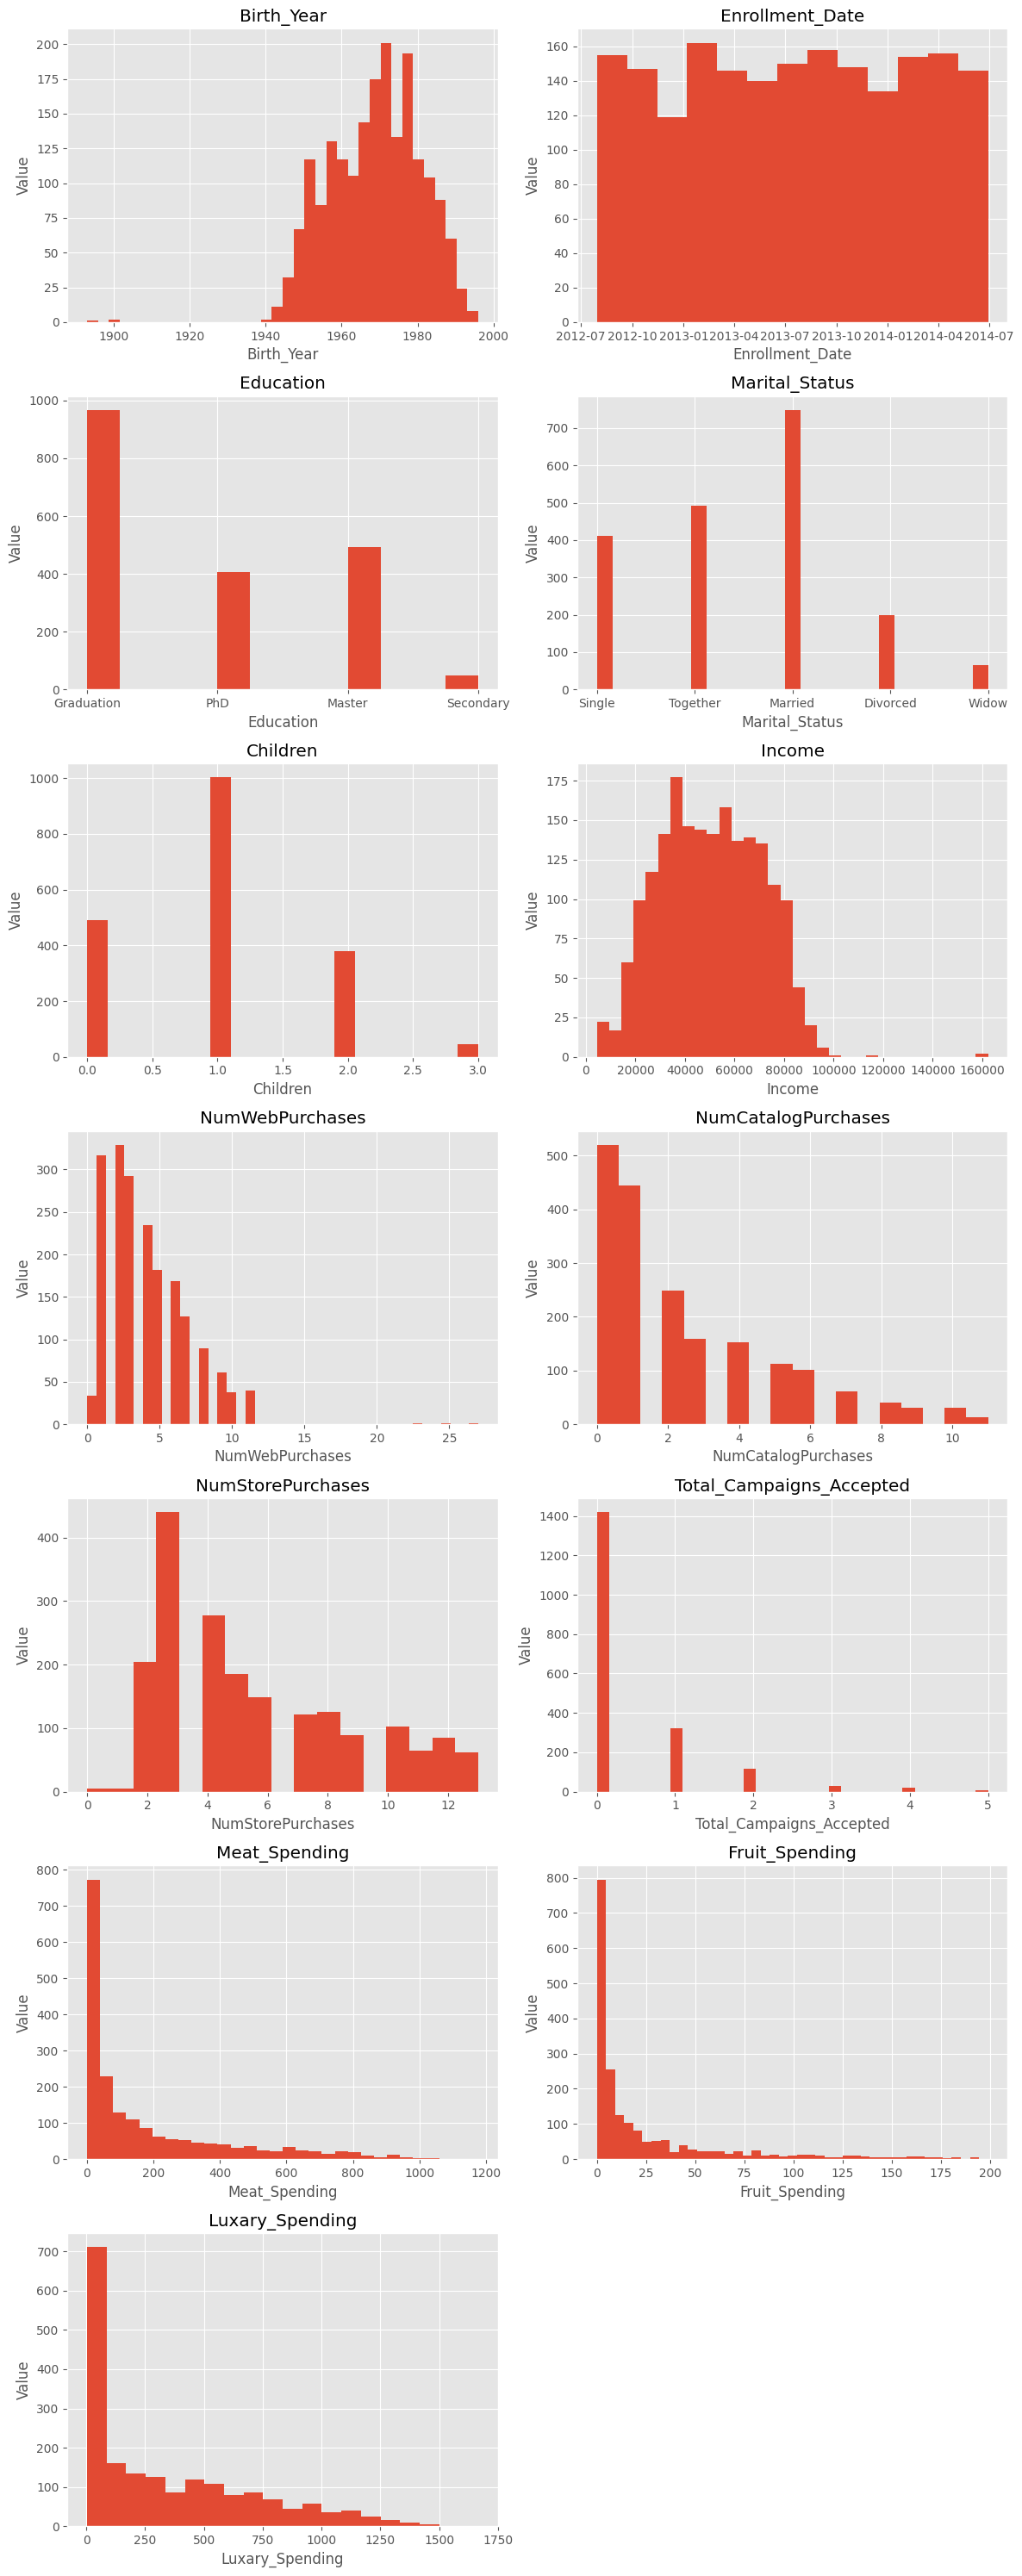

In [2072]:
column_number = 0
number_of_rows = int(len(df.columns)/2)
figure, axis = plt.subplots(number_of_rows+1, 2, figsize=(12, 30))

for i in range(number_of_rows+1):
    axis[i, 0].hist(df[df.columns[column_number]], bins = "auto")
    axis[i, 0].set_title(df.columns[column_number])
    axis[i, 0].set_xlabel(df.columns[column_number])
    axis[i, 0].set_ylabel("Number of People")
    column_number += 1
    if(column_number < len(df.columns)):
      axis[i, 1].hist(df[df.columns[column_number]], bins = "auto")
      axis[i, 1].set_title(df.columns[column_number])
      axis[i, 1].set_xlabel(df  .columns[column_number])
      axis[i, 1].set_ylabel("Number of People")
      column_number += 1

figure.delaxes(axis[number_of_rows, 1]) #Removes the extra plot

plt.tight_layout()
plt.show()


#####Great, now we have a general understanding of our numerical columns using a histogram
#####We'll explore some of the columns above that have depth to them, judged off of inspection.
#####Many approximations are made below.


## Birth Year

In [2073]:
print(df["Birth_Year"].describe())

count    1915.000000
mean     1968.737337
std        11.941753
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Birth_Year, dtype: float64


In [2074]:
from scipy.stats import kurtosis

#We are using Fisher's definition in this Jupyter Notebook
print(kurtosis(df["Birth_Year"]))

0.9843887427673943


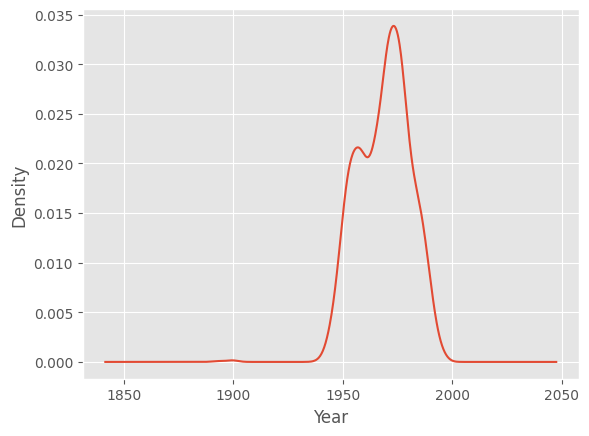

In [2108]:
scaled = df["Birth_Year"]
scaled.plot(kind="kde")
plt.xlabel("Year")
plt.show()

#####Pretty standard. We can conclude that the distribution is close to normal and that almost all people in this dataset were born from ~1945-1985.

##Education + Marital Status + Children

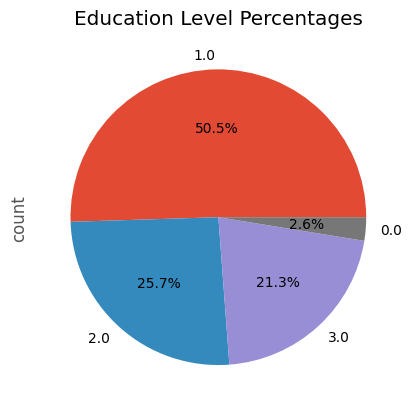

In [2116]:
counts = df["Education"].value_counts()
ax = counts.plot(kind="pie", autopct="%1.1f%%", title="Education Level Percentages")

plt.show()

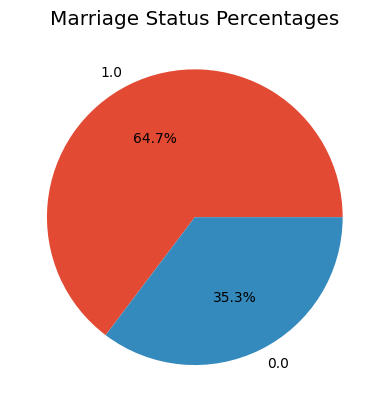

In [2118]:
counts = df["Marital_Status"].value_counts()
ax = counts.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Marriage Status Percentages")

plt.show()

#####1/2 people graduated university. Beyond that, 1/4 also a masters and 1/4 have earned up to a PhD. A small % of people only completed high school.
#####2/5 are married, 1/4 have a partner (but aren't married), and 1/5 are single. Beyond that, there is a small % of people divorced and widowed.


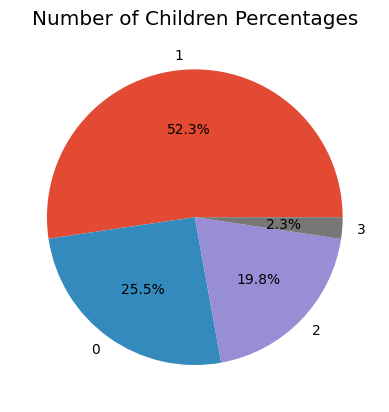

In [2119]:
counts = df["Children"].value_counts()
ax = counts.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Number of Children Percentages")

plt.show()

####Fraction | Includes % of people
#####1/4 people have no children | 25%
#####1/2 have 1 child | 75%
#####1/5 have 2 children | 95%
#####1/50 have 3 children | 100%

##Income

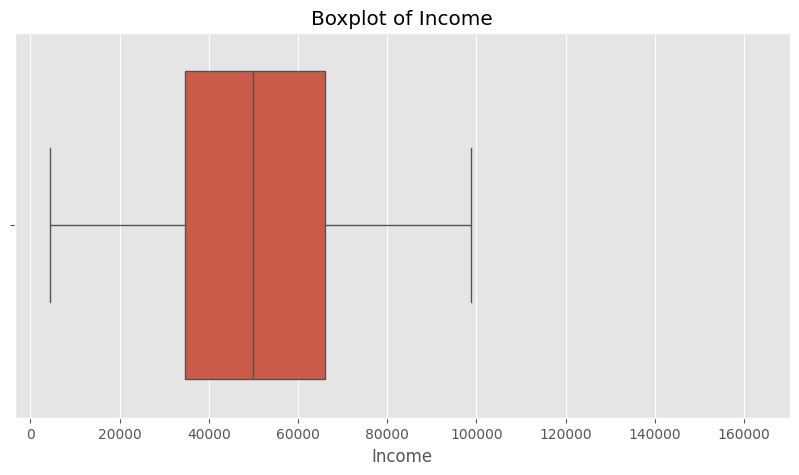

count      1915.000000
mean      50438.664752
std       20242.702488
min        4428.000000
10%       23862.000000
25%       34598.000000
50%       50002.000000
75%       65995.500000
90%       77708.400000
max      162397.000000
Name: Income, dtype: float64

In [2120]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Income", fliersize=0)
plt.title("Boxplot of Income")
plt.show()
df["Income"].describe(percentiles=[0.1, 0.25, 0.75, 0.9])

In [2081]:
print(kurtosis(df["Income"]))

-0.06373460229827277


##### We can see that the median makes 51000, and the majority make in between 24000 and 78000. The distribution is close to normal

##Product Spending

###Fruit Spending

In [2082]:
print(df["Fruit_Spending"].describe(percentiles=[0.1, 0.25, 0.75, 0.9]))

count    1915.000000
mean       24.852219
std        38.847350
min         0.000000
10%         0.000000
25%         1.000000
50%         7.000000
75%        30.000000
90%        80.000000
max       199.000000
Name: Fruit_Spending, dtype: float64


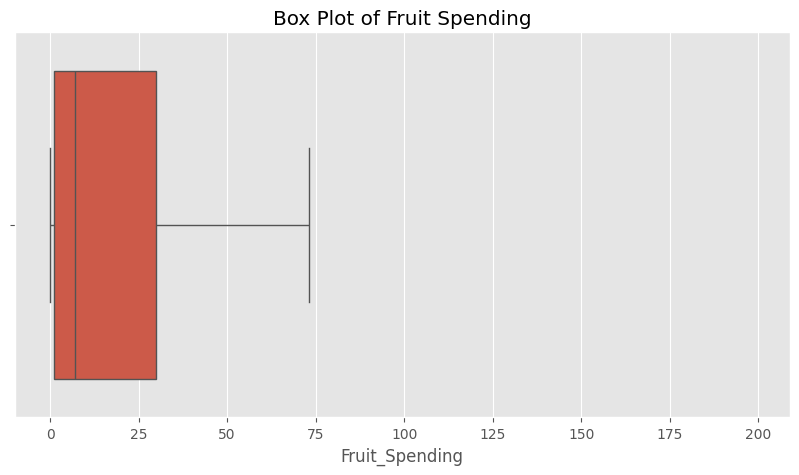

In [2121]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Fruit_Spending", fliersize=0)
plt.title("Box Plot of Fruit Spending")
plt.show()

In [2084]:
print(kurtosis(df["Fruit_Spending"]))

4.471531323127051


####Overall, we can see that half of people don't care for fruits and the other half does. The top spenders tend to buy a lot of fruits (top 25%). The distribution is leptokurtic.

###Meat Spending

In [ ]:
print(df["Meat_Spending"].describe(percentiles=[0.1, 0.25, 0.75, 0.9]))

count    1915.000000
mean      182.484073
std       230.868414
min         1.000000
10%         9.000000
25%        20.000000
50%        71.000000
75%       267.000000
90%       555.800000
max      1177.000000
Name: Meat_Spending, dtype: float64


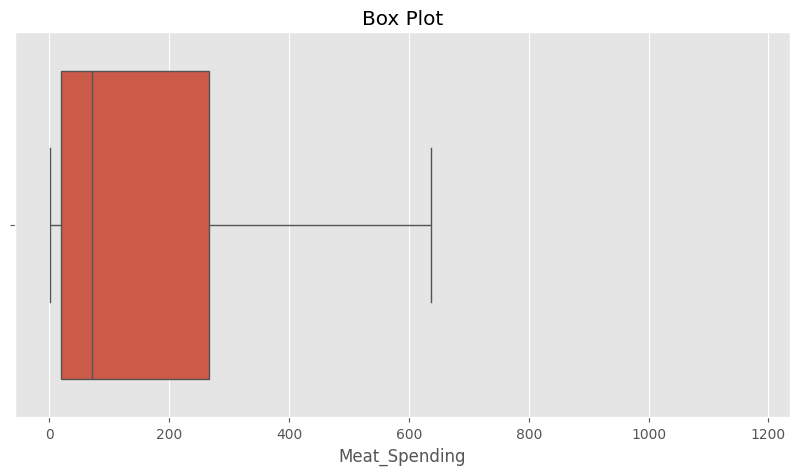

In [2088]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Meat_Spending", fliersize=0)
plt.title("Box Plot of Meat Spending")
plt.show()

In [2089]:
print(kurtosis(df["Meat_Spending"]))

1.7338266737893449


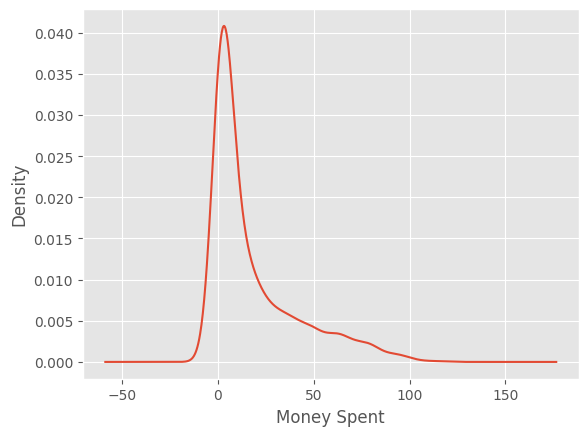

In [2125]:
scaled = df["Meat_Spending"]/10
scaled.plot(kind="kde")
plt.xlabel("Amount of Money Spent")
plt.show()

#####The distribution of meat spending is more evenly distributed than the previous spendings of fruit and gold. This may seem like a strange conclusion to come to given the graphs above and the very high amount spend by top spenders. However, the important thing to note is that the bottom 25% and 50% of spenders spend up to 20 and 71 respectively vs 1 and 7 for fruit. We can also see that the distribution range is large -- 10th-90th percentile ranging from 9 to 555

###Luxary Spending

count    1915.000000
mean      350.132637
std       358.308529
min         3.000000
10%        18.000000
25%        40.000000
50%       218.000000
75%       573.000000
90%       909.600000
max      1667.000000
Name: Luxary_Spending, dtype: float64


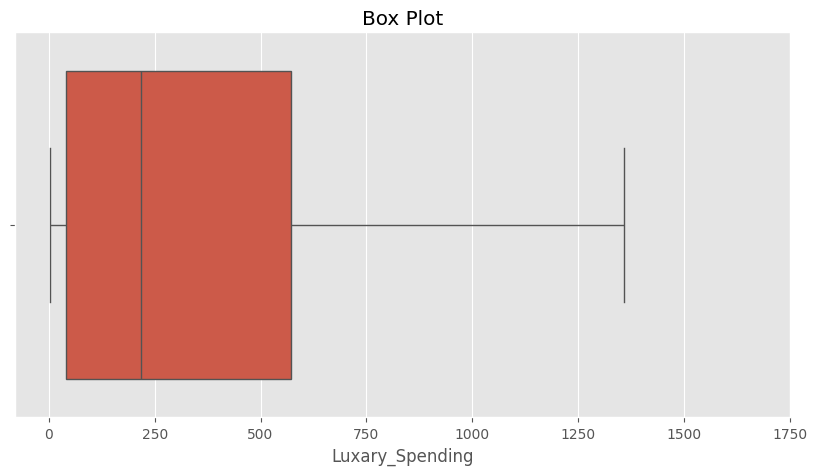

0.045263550400195474


In [2091]:
print(df["Luxary_Spending"].describe(percentiles=[0.1, 0.25, 0.75, 0.9]))

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Luxary_Spending", fliersize=0)
plt.title("Box Plot of Luxary Spending")
plt.show()

In [ ]:
print(kurtosis(df["Luxary_Spending"]))

#####The same thing happened again with the kurtosis of luxary spending, this time with the median being 218. The range is again spread out with 10th-90th percentile ranging from 18 to 909.
#####We can conclude that the people in our dataset spend a fair amount on luxary products every year.

#####For the other columns that concerned directly with purchases and marketing, exploring their distributions is sufficiently done in our histogram and we are concerned with their correlation with their feature relations. Let's move onto doing that. We can finally see a correlation heatmap for our variables!

#**Step 4: Feature Relationships**

##Correlation Heatmap

#####For our heatmap, let's quickly map our string columns so we'll be able to see their compare them with the other numerical columns.

In [2107]:
print(df["Education"].unique())
print(df["Marital_Status"].unique())

[1. 3. 2. 0.]
[0. 1.]


#####We'll use label encoding. This process can be shown clearly below.
#####At this point, we are actually also going to simplify Marital_Status to just single/not single to make our analysis more simplified.

In [2094]:
custom_education_label_mapping = {
  "Secondary": 0,
  "Graduation": 1,
  "Master": 2,
  "PhD": 3
}

df["Education"] = df["Education"].map(custom_education_label_mapping).astype(float)

In [2095]:
custom_marital_status_label_mapping = {
  "Single": 0,
  "Widow": 0,
  "Divorced": 0,
  "Together": 1,
  "Married": 1
}

df["Marital_Status"] = df["Marital_Status"].map(custom_marital_status_label_mapping).astype(float)

#####For correlation analysis, we're gonna have to change our date column from datetime to int. Once an int, each value begins as the number of nanoseconds from the date to the Unix Epoch Time. Each date value is eventually converted to the number of days since the first (minimum) date in our dataframe.

In [2096]:
df["Enrollment_Date"] = df["Enrollment_Date"].astype(int) // 10**9 // 86400
df["Enrollment_Date"] = df["Enrollment_Date"] - 15551
df["Enrollment_Date"] = df["Enrollment_Date"].astype(float)

#####We can finally use a correlation heatmap:

In [2098]:
df_corr = df[[col for col in df.columns]].corr()

plt.figure(figsize=(102, 100))
sns.heatmap(df_corr, annot=True)
plt.show()

#####What a huge graph! Notice that the top outer 4 columns seem to have very low correlations. Let's remove them and simplify this hectic heatmap!






In [2099]:
df.columns

Index(['Birth_Year', 'Enrollment_Date', 'Education', 'Marital_Status', 'Children', 'Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Campaigns_Accepted', 'Meat_Spending', 'Fruit_Spending', 'Luxary_Spending'], dtype='object')

In [2100]:
df_corr = df[['Children', 'Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Campaigns_Accepted', 'Meat_Spending', 'Fruit_Spending', 'Luxary_Spending']].corr()

plt.figure(figsize=(102, 100))
sns.heatmap(df_corr, annot=True)
plt.show()

Still big, but much more clear. You're welcome to look at the correlations. I will refer back to this heatmap often from now on.

#####Let's make a scatter plot between all of the correlations that stand out (aka the correlations that both stand out and that are also not intuitively obvious).

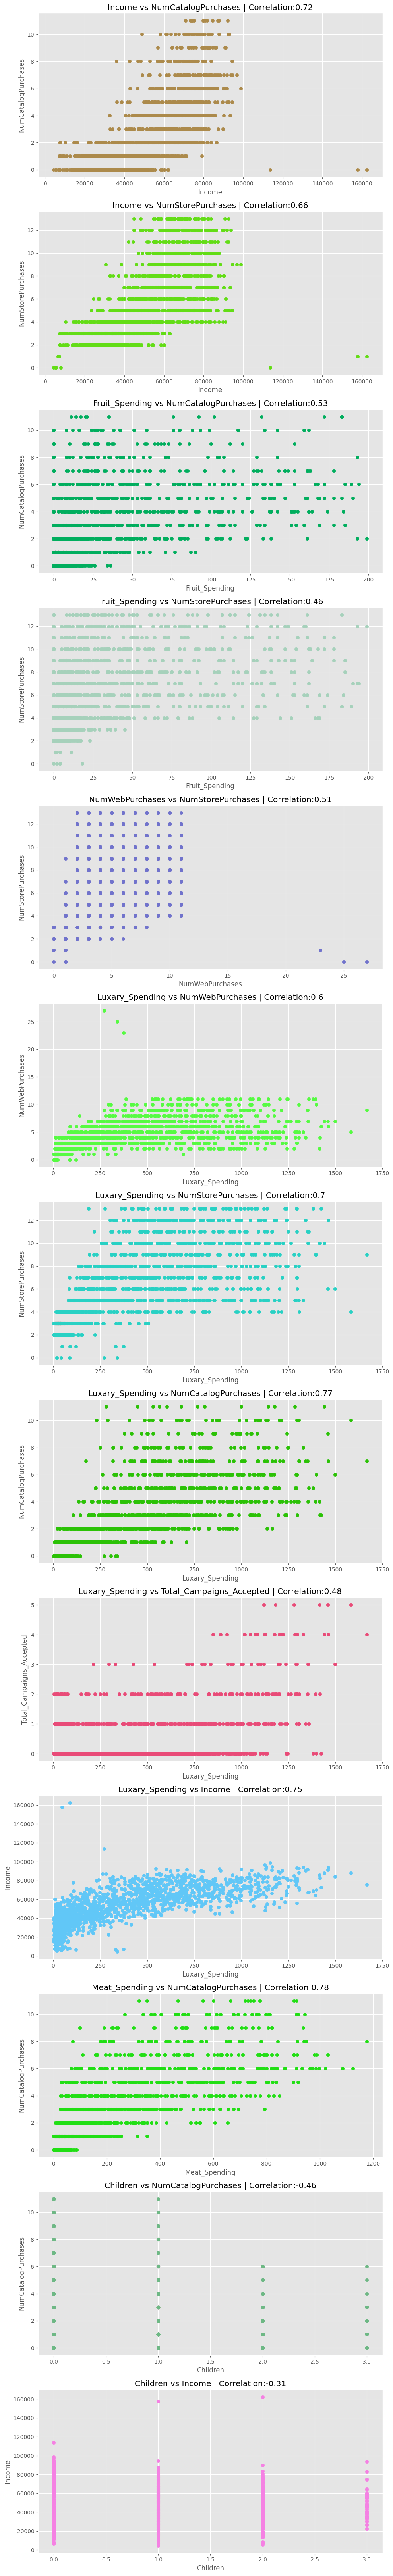

In [2101]:
single_variables = ["Income", "Fruit_Spending", "NumWebPurchases", "Luxary_Spending", "Meat_Spending", "Children", ]
multiple_variable_combinations = [["NumCatalogPurchases", "NumStorePurchases"], ["NumCatalogPurchases", "NumStorePurchases"], ["NumStorePurchases"], ["NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases", "Total_Campaigns_Accepted", "Income"], ["NumCatalogPurchases"], ["NumCatalogPurchases", "Income"]]

number_of_rows = sum(len(row) for row in multiple_variable_combinations)
figure, axis = plt.subplots(number_of_rows, 1, figsize=(10, 5 * number_of_rows))

number = 0
for i, s_v in enumerate(single_variables):
  for j, m_v in enumerate(multiple_variable_combinations[i]):
    axis[number].scatter(df[s_v], df[m_v], color=np.random.rand(3,)) #fix later
    axis[number].set_xlabel(s_v)
    axis[number].set_ylabel(m_v)
    axis[number].set_title(f"{s_v} vs {m_v} | Correlation:{round(df[m_v].corr(df[s_v]), 2)}")
    number += 1

plt.tight_layout()
plt.show()


#####Let's also make a pairplot between the kinds of spending:

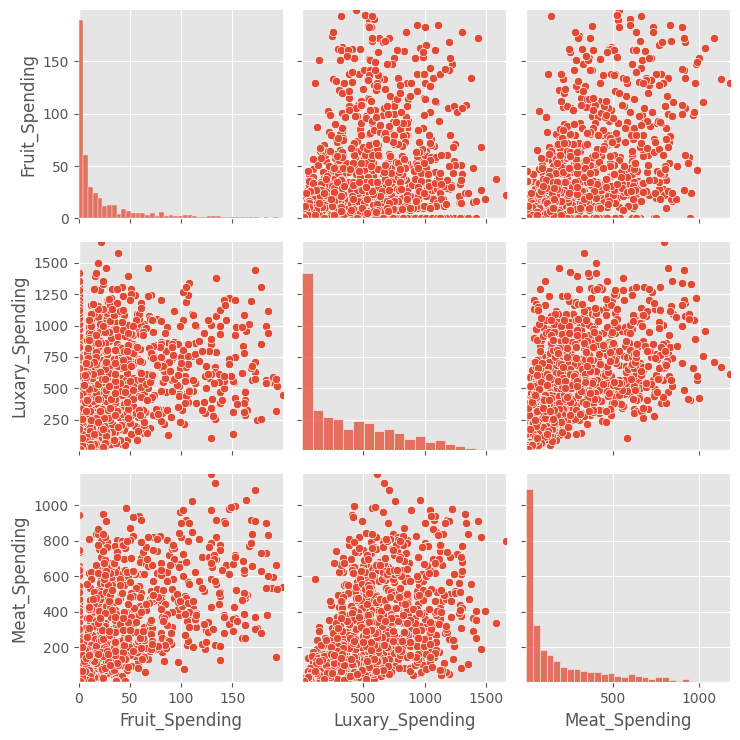

In [2102]:
pairplot = sns.pairplot(df, vars=["Fruit_Spending", "Luxary_Spending", "Meat_Spending"])

for axis in pairplot.axes.flatten():
  x_label = axis.get_xlabel()
  if x_label in df.columns:
    axis.set_xlim(df[x_label].min(), df[x_label].max())

  y_label = axis.get_ylabel()
  if y_label in df.columns: #not 100% sure how this works
    axis.set_ylim(df[y_label].min(), df[y_label].max())

plt.tight_layout()
plt.show()

In [2103]:
columns_to_correlate = ["Fruit_Spending", "Luxary_Spending", "Meat_Spending", "Income"]
df[columns_to_correlate].corr()

,Fruit_Spending,Luxary_Spending,Meat_Spending,Income
Fruit_Spending,1.000000,0.460642,0.677605,0.520921
Luxary_Spending,0.460642,1.000000,0.685733,0.753258
Meat_Spending,0.677605,0.685733,1.000000,0.722354
Income,0.520921,0.753258,0.722354,1.000000


#####Great. We can see a few things visually based on the heatmap/scatter plots:

#####How to read my formatting: an example
#####Income, Children | Fruit_Spending
#####This means I'm referring to the correlations between Income and Fruit_Spending AND Children and Fruit_Spending

1. The strongest correlation between any 2 different columns is between luxary spending and income. This should come at no surprise. Furthermore, there is a very strong similarity in the correlation between Luxary_Spending |
 NumWebPurchases, NumStorePurchase and
Income | NumWebPurchases, NumStorePurchase. However, upon another inspection of the correlation heatmap, luxary spenders have a slightly stronger correlation with NumWebPurchases compared to Income | NumWebPurchases.

2. Correlation between Income, Fruit_Spending, Luxary_Spending (lesser for Fruit_Spending) | spend more money at our store.

3.   There is a *moderate* correlation between people who come in our store and who shop on our website. The key word here is moderate.
4. Moderate correlation between Luxary_Spending | Total_Campaigns_Accepted. Given the almost identical correlation between Meat_Spending, Luxary_Spending | Income, but the greater correlation between Total_Campaigns_Accepted | Luxary_Spending, this implies that luxary spenders have less impulse control toward our campaigns.
5. Meat_Spending | NumCatalogPurchases. Children | NumCatalogPurchases but this correlation is negative. Meat_Spending | Children is also a negative correlation.

In [2104]:
print("\n".join(f"Average income for {round(child_count, 0)} children: {df.query(f'Children == {child_count}')['Income'].median()}" for child_count in df['Children'].value_counts().sort_index().index))


Average income for 0 children: 71466.0
Average income for 1 children: 46608.0
Average income for 2 children: 44078.0
Average income for 3 children: 45072.0


6. If we look at Children and Income, we can see that there is a pretty clear negative correlation between children and income. The interesting thing is that the difference between the median between having 0 children and 1 child is ~25000!
7. The correlation between the different types of spending is clearly high. This is due to income, although there is other factors at play, especially with fruit spending.
8. The columns of Birth_Year, Enrollment_Date, Education, and Marital_Status surprisingly had little to no correlations with other columns.

#**Step #5: Answering Questions**
##### This part should be quite easy, given that the analysis is already done.
##### So let's ask some interesting questions about our data.

### 1. What customers are most likely to spend money on fruit, meat, and luxary products? What customers are most likely to buy our products/accept our campaigns?

#####A good answer to this question is a table.
#####Here is a summary of the major correlations that stand out:

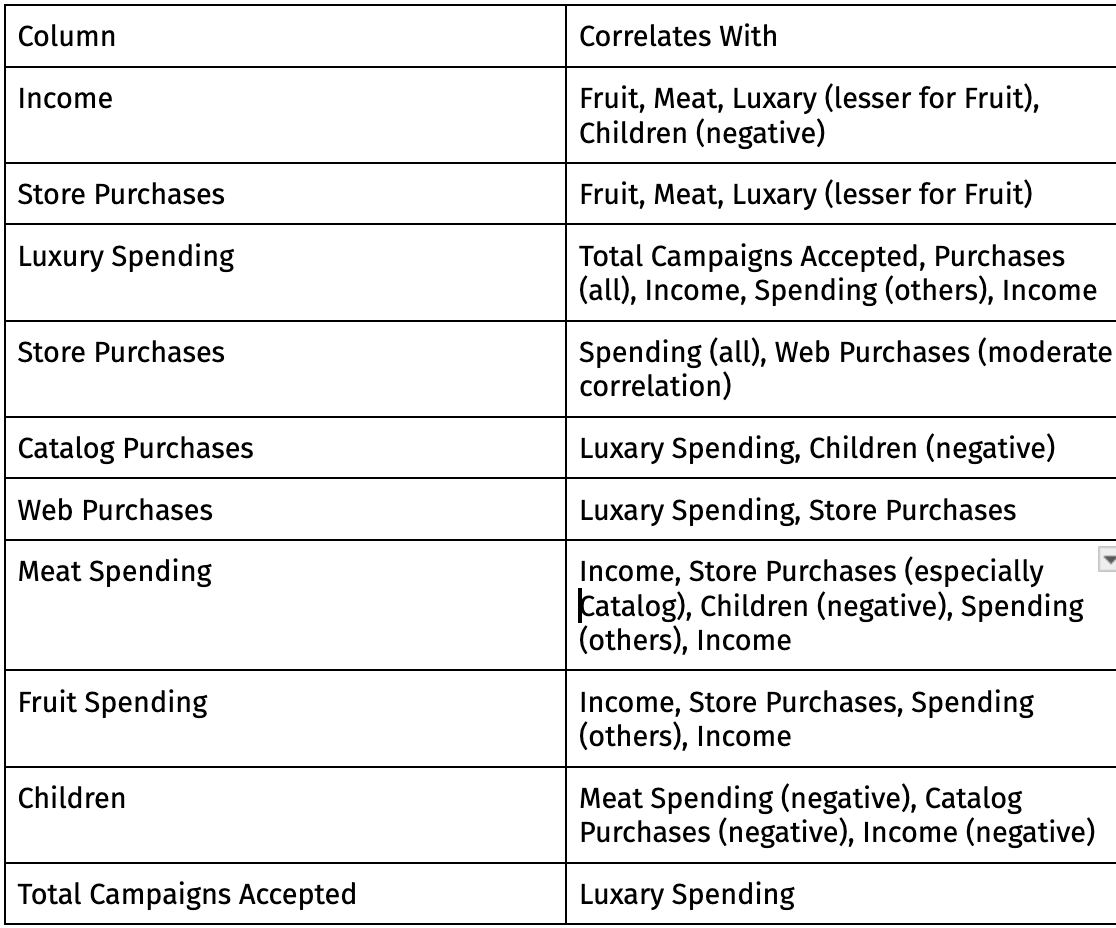

### 2. What is our store?
##### One very interesting thing that is unclear in our data is what type of store all of our marketing and purchase data belongs to! What could our store possible be?
##### After a long understanding of our dataset, we can conclude that the people who buy from our store and are receptive to our marketing campaigns tend to have a high income, buy lots of luxary, meat, fruit products (order of strength: luxary, meat, fruit), and have less children.

The median statistics of our top customers:

In [2105]:
df["Total_Purchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
top = df[(df["Total_Campaigns_Accepted"] >= df["Total_Campaigns_Accepted"].quantile(0.75)) & (df["Total_Purchases"] >= df["Total_Purchases"].quantile(0.75))]
print(top.mean())

Birth_Year                   1966.881517
Enrollment_Date               315.592417
Education                       1.763033
Marital_Status                  0.630332
Children                        0.388626
Income                      71775.545024
NumWebPurchases                 6.582938
NumCatalogPurchases             5.995261
NumStorePurchases               8.786730
Total_Campaigns_Accepted        1.725118
Meat_Spending                 458.023697
Fruit_Spending                 55.274882
Luxary_Spending               908.118483
Total_Purchases                21.364929
dtype: float64


#####This reaffirms what we discovered. We can conclude that the business in the dataset is likely a high-end luxary business. It could be in...

Fashion, jewlery, cars, hotels, dining, wellness, skincare, travel, a private club, art, technology, etc.



###Thanks for browsing my EDA! I appreciate your time 🙂